# F1 Canadian Grand Prix June 2024 

In [27]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np

In [ ]:
df = pd.read_csv(r"D:\PYTON PROGRAMMING\PYTHON FILES\Data-Visualization-Using-Python\PROJECTS\F1 RACE ANALYSIS PROJECTS\F1 Candian GP 2025\F1 CANADIAN GP.csv")

In [66]:
df.columns = df.columns.str.strip()
df.head()

,Sl no.,Driver Name,Team Name,Qualifying Lap Time,Grid Position,L1,L2,L3,L4,L5,...,L62,L63,L64,L65,L66,L67,L68,L69,L70,FINISHED
0,1,George Russell,Mercedes,01:11.0,1,1,1,1,1,1,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,2,Max Verstappen,Red Bull Racing Honda RBPT,01:11.1,2,2,2,2,2,2,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
2,3,Oscar Piastri,McLaren Mercedes,01:11.1,3,4,4,4,4,4,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
3,4,Kimi Antonelli,Mercedes,01:11.4,4,3,3,3,3,3,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
4,5,Lewis Hamilton,Ferrari,01:11.5,5,5,5,5,5,5,...,7.0,7.0,7.0,7.0,7.0,7.0,6.0,6.0,6.0,6.0


## Driver's Position Analysis Lap By Lap

In [67]:
grid_position_driver = df['Driver Name'].to_list()
grid_no = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

In [68]:
team_colors = {
    'Mercedes': '#00D2BE',
    'Red Bull Racing Honda RBPT': '#1E41FF',
    'Ferrari': '#DC0000',
    'McLaren Mercedes': '#FF8000',
    'Aston Martin Aramco Mercedes': '#006F62',
    'Alpine Renault': '#0090FF',
    'Williams Mercedes': '#005AFF',
    'Kick Sauber Ferrari': '#52E252',
    'Haas Ferrari': '#B6BABD',
    'Racing Bulls Honda RBPT': '#6692FF'
}

driver_teams = df.set_index('Driver Name')['Team  Name'].str.strip().to_dict()

In [69]:
lap_data = {}

for _, row in df.iterrows():
    driver = row['Driver Name'].strip()  # clean name
    laps = row.iloc[4:].dropna().astype(int).tolist()  # get lap positions
    lap_data[driver] = laps

In [ ]:
fig, ax = plt.subplots(figsize=(50, 25))

# Set the background color of the entire figure canvas to black.
fig.patch.set_facecolor('black')    # .patch is the rectangle that is the background of the figure.
                                  
# Set plot (axes) background color to black
ax.set_facecolor('black')

# Set axis labels and tick color to white
ax.tick_params(colors='white')         # .tick_params(...)	Customizes tick appearance
ax.xaxis.label.set_color('white')      # X-axis label color
ax.yaxis.label.set_color('white')      # ax, the plot area (Axes object)
ax.title.set_color('white')

# Make the axis color white
for spine in ax.spines.values():       # It changes the color of all four border lines (called spines) around your plot to white.
    spine.set_color('white')

# Plots the graph of lap times
for driver, laps in lap_data.items():
    team = driver_teams[driver]
    color = team_colors.get(team, 'white')  # default to white if team not found
    ax.plot(range(1, len(laps)+1), laps, linewidth=6, color=color, label=driver)

    
ax.set_xlim(0, 75)
ax.set_ylim(0, 21)

plt.xticks(range(1,71,2), fontsize = 25)
plt.yticks(range(1,21), fontsize = 20)

ax.set_yticklabels(grid_position_driver, fontsize = 25)
ax.grid(True, linestyle='--', alpha=0.2)

for grid in grid_no:
    ax.text(72.5, grid, 'F', fontsize=25, color='white',ha='left', va='center')

ax.invert_yaxis()

plt.title('F1 Canadian GP 2025', fontsize = 40, color = 'r', pad=20)
plt.show()

## Position Gained/Loss

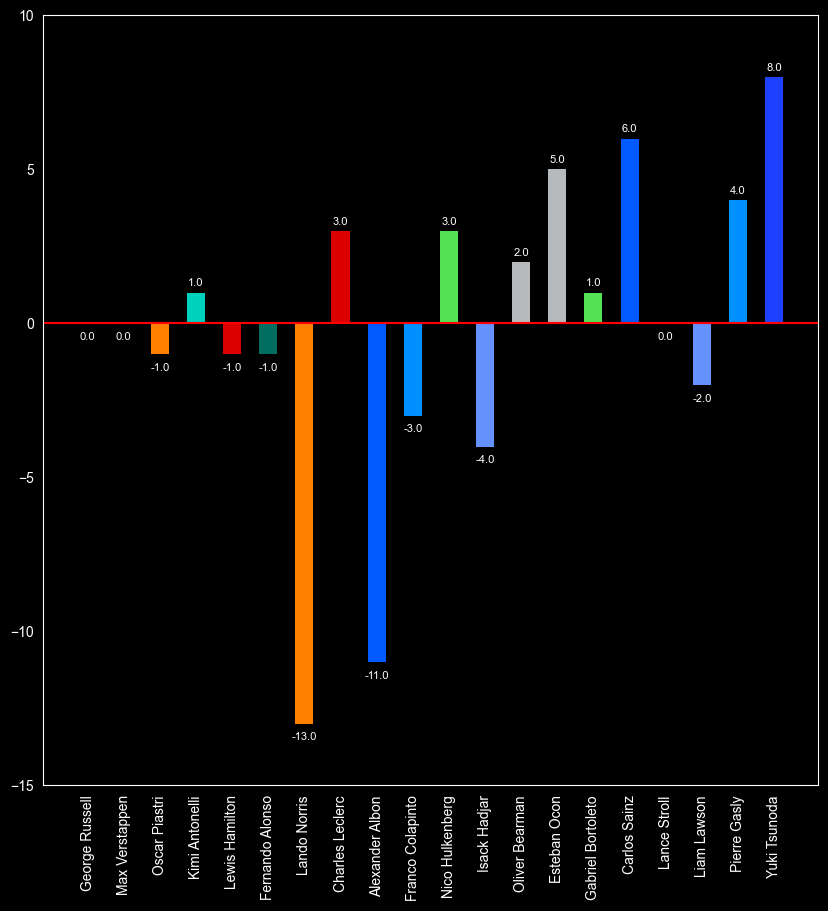

In [8]:
import matplotlib.font_manager as fm

font_name = 'Arial'
font_file = r"C:\Users\LENOVO\Downloads\Arial Font\ARIAL.TTF"

# Register the font with matplotlib
fm.fontManager.addfont(font_file)

df['FINISHED'] = df['FINISHED'].fillna(20)
df['Gain/Loss'] = df['Grid Position'] - df['FINISHED']

fig, ax = plt.subplots(figsize=(10,10))

fig.set_facecolor('black')

ax.set_facecolor('black')

for spine in ax.spines.values():
    spine.set_color('white')

for driver, team in driver_teams.items():
    color = team_colors.get(team, 'white')  # default to white if team not found
    ax.bar(
    x = driver,
    height = df['Gain/Loss'][df['Driver Name'] == driver],
    color = color,
    width = 0.5
)
    
for driver in df['Driver Name']:
    height = df.loc[df['Driver Name'] == driver, 'Gain/Loss'].values[0]
    if height > 0:
        ax.text(
            driver, 
            height + 0.3, 
            str(height),
            color = 'white', 
            fontsize = 8,
            fontname = font_name, 
            ha = 'center', 
            va = 'center'
        )
    else:
        ax.text(
            driver, 
            height - 0.6, 
            str(height),
            color = 'white', 
            fontsize = 8, 
            fontname = font_name,
            ha = 'center', 
            va = 'bottom'
        )

plt.ylim((-15, 10))

plt.yticks(color = 'white', fontsize = 10, fontname = font_name)
plt.xticks(rotation=90, color = 'white', fontsize = 10, fontname = font_name)


ax.axhline(y=0, color='red', linestyle='-')
plt.show()

In [7]:
import fastf1

# Enable FastF1 cache
fastf1.Cache.enable_cache(r"D:\PYTON PROGRAMMING\PYTHON FILES\Data-Visualization-Using-Python\PROJECTS\F1 RACE ANALYSIS PROJECTS\F1 Candian GP 2025\cache")

# Load session
session = fastf1.get_session(2025, 'canada', 'R')  
session.load()

# Get the laps data
df = session.laps

core           INFO 	Loading data for Canadian Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['63', '1', '12', '81', '16', '44', '14', '27', '31', '55', '87', '22', '43', '5', '10', '6', '18', '4', '30', '23']


#

## Race Strategy For Max Verstappen

In [8]:
df.columns

Index(['Time', 'Driver', 'DriverNumber', 'LapTime', 'LapNumber', 'Stint',
       'PitOutTime', 'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time',
       'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
       'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest',
       'Compound', 'TyreLife', 'FreshTyre', 'Team', 'LapStartTime',
       'LapStartDate', 'TrackStatus', 'Position', 'Deleted', 'DeletedReason',
       'FastF1Generated', 'IsAccurate'],
      dtype='object')

In [50]:
verstappen[verstappen['LapNumber']==70]['Compound']

69    HARD
Name: Compound, dtype: object

In [25]:
df['seconds'] = pd.to_timedelta(df['LapTime']).dt.total_seconds()


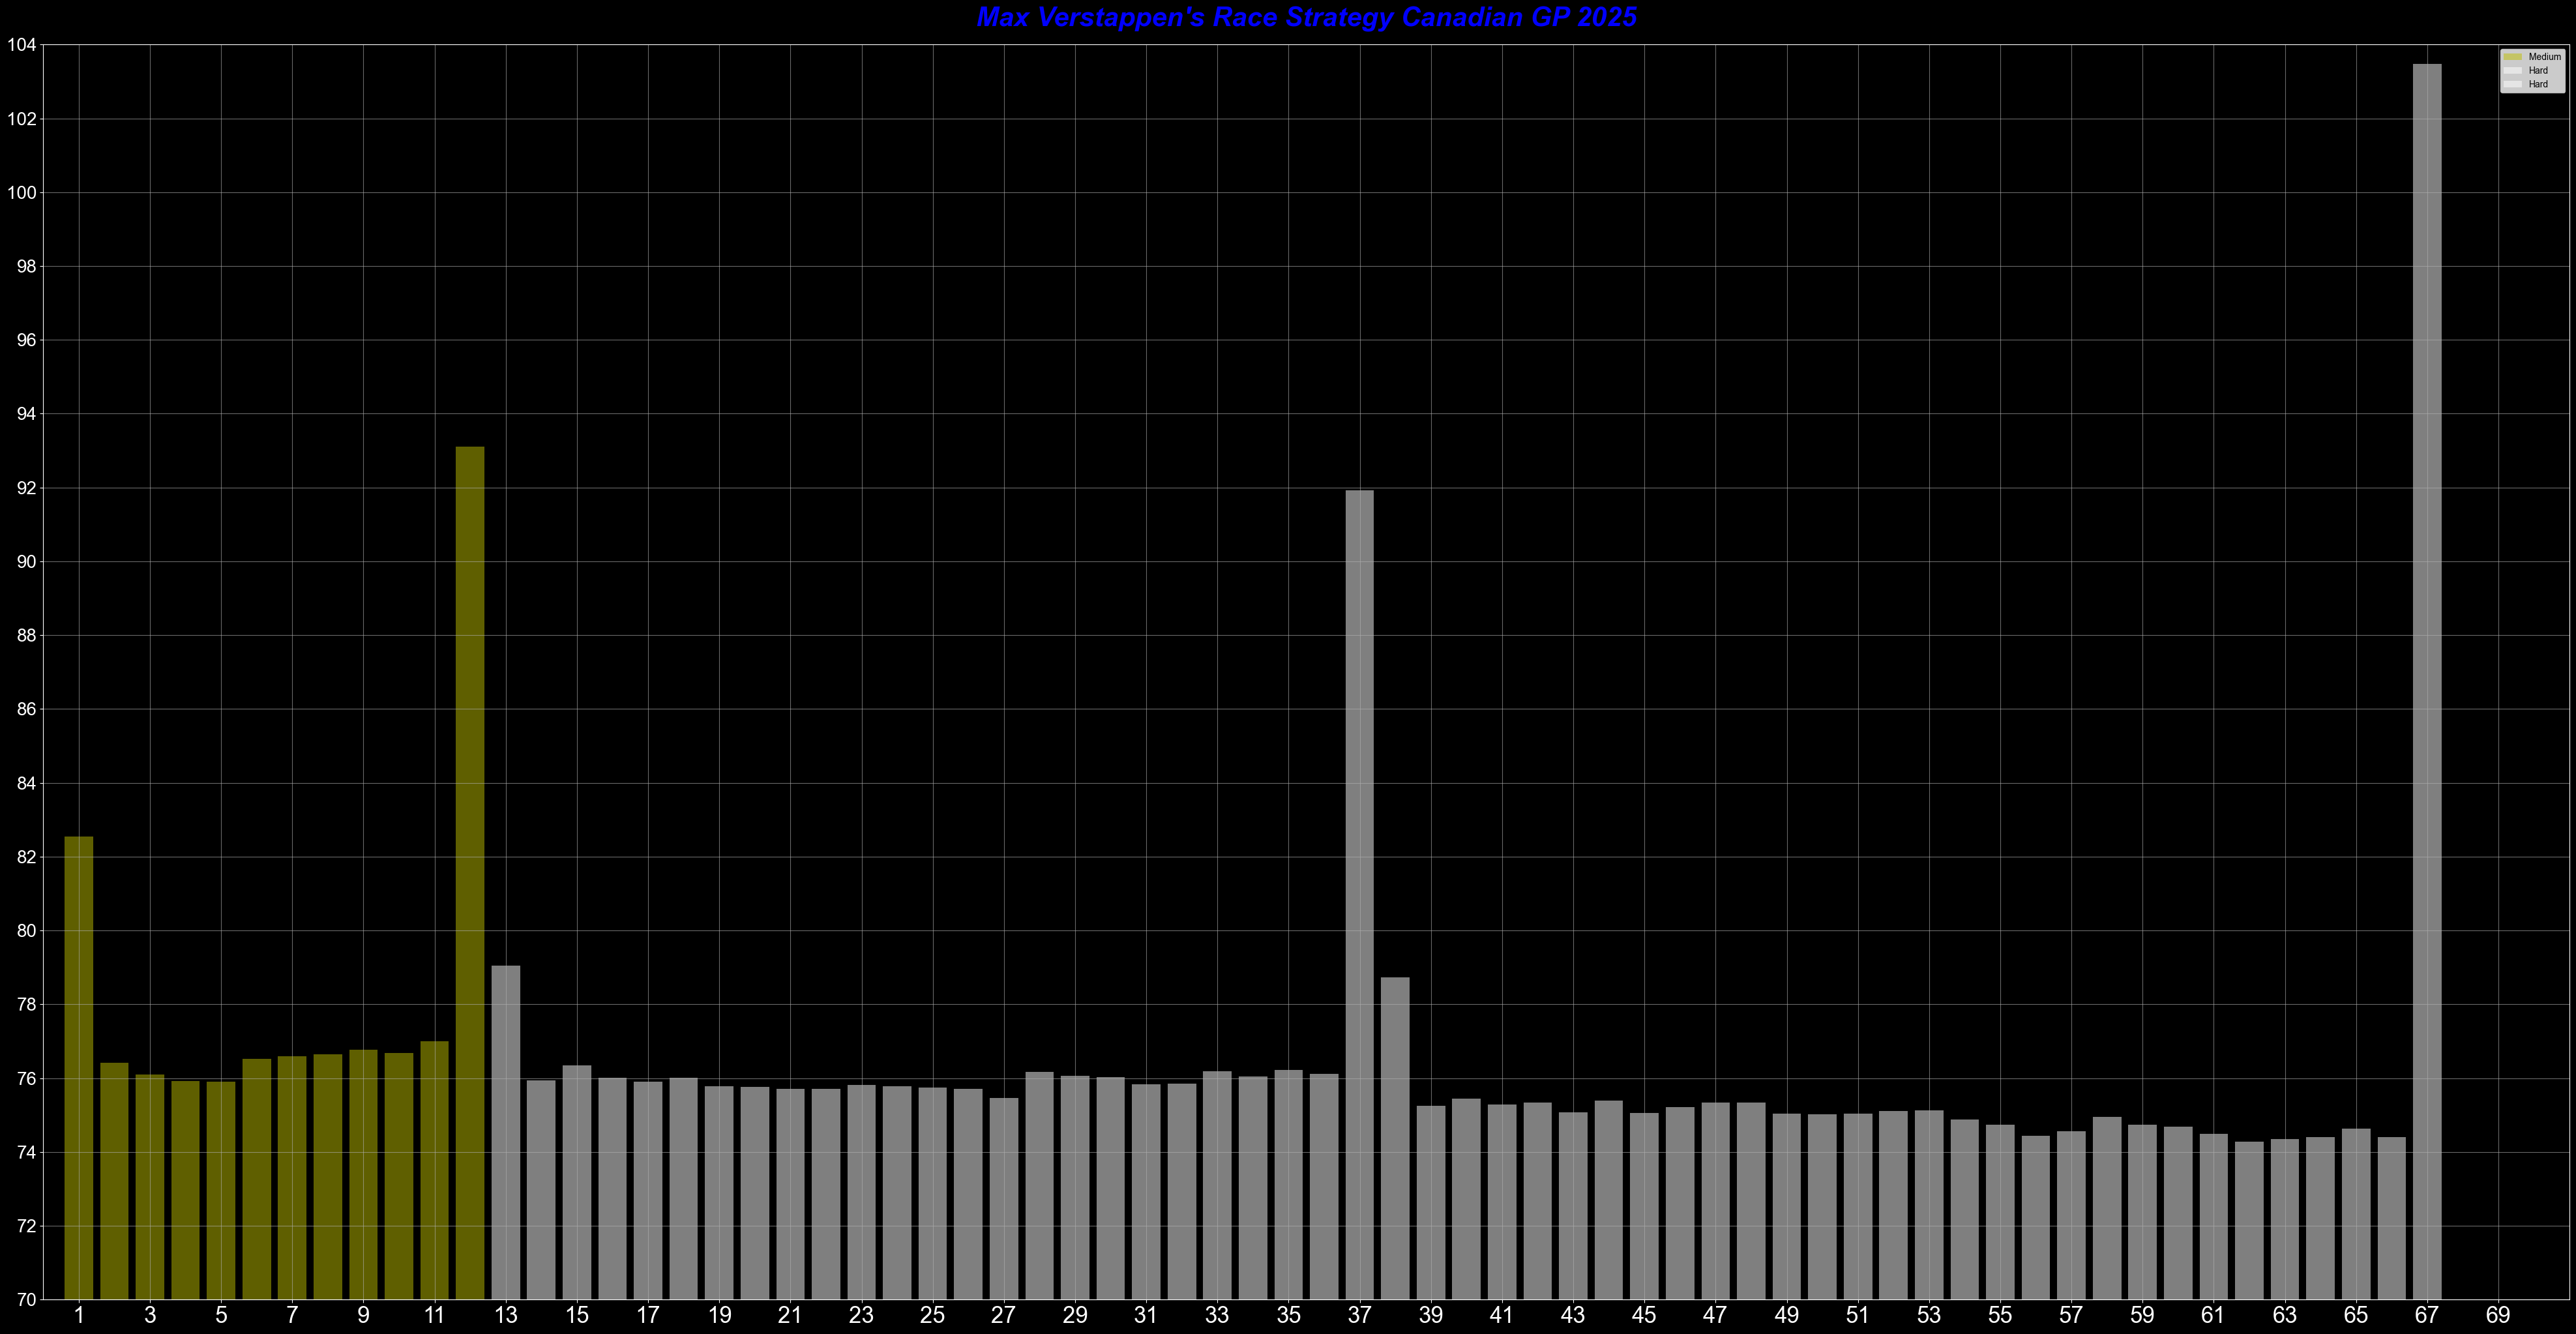

In [59]:
verstappen = df[df['Driver'] == 'VER']
stint_1 = verstappen[verstappen['Stint'] == 1]['seconds']
stint_2 = verstappen[verstappen['Stint'] == 2]['seconds']
stint_3 = verstappen[verstappen['Stint'] == 3]['seconds']

fig, ax = plt.subplots(figsize=(50, 25))
plt.rcParams['font.family'] = 'Arial'

fig.set_facecolor('black')
ax.set_facecolor('black')

for spine in ax.spines.values():
    spine.set_color('white')

ax.tick_params(axis='both', colors='white')

ax.bar(verstappen[verstappen['Stint'] == 1]['LapNumber'] ,stint_1, label = 'Medium', color='y', alpha = 0.5)
ax.bar(verstappen[verstappen['Stint'] == 2]['LapNumber'] ,stint_2, label = 'Hard', color='#FFFFFF', alpha = 0.5)
ax.bar(verstappen[verstappen['Stint'] == 3]['LapNumber'] ,stint_3, label = 'Hard',color='#FFFFFF', alpha = 0.5) 

plt.xlim(0,71)
plt.ylim(70,100)

plt.xticks(range(1,71,2), font='Arial', fontsize = 25)
plt.yticks(range(70,105,2),font='Arial', fontsize = 20)

ax.grid(True, linestyle='-', alpha=0.6)

plt.title("Max Verstappen's Race Strategy Canadian GP 2025",font = 'Arial', fontweight = 'bold' , fontstyle='italic', fontsize = 30, color = 'blue', pad=20)

plt.legend(fontsize=100, prop={'family': 'Arial'})
plt.show()